In [53]:
# gọi hai thuật toán chạy trong notebook này
%run decisionTree.ipynb
%run randomForest.ipynb

In [54]:
# nhập thư viện
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from DecisionTree import DecisionTreeClass
from RandomForest import RandomForest
from sklearn.metrics import accuracy_score  

In [ ]:
# lấy dữ liệu
file_path = 'drug200.csv'
data = pd.read_csv(file_path)
data

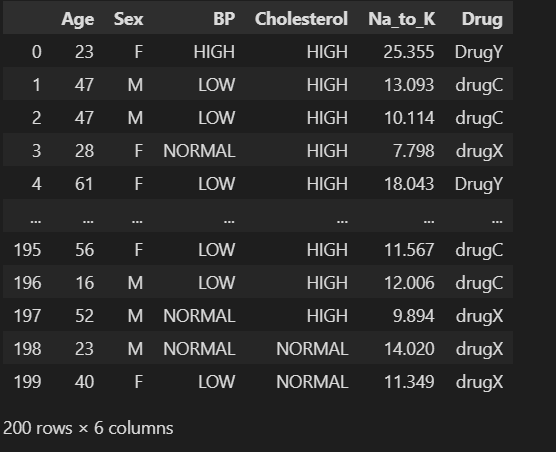

In [56]:
# tạo tập X và y
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']] # frame
y = data['Drug'] # series

In [ ]:
# xem giá trị xuất hiện của các cột định tính để biến đổi bước tiếp theo
# chúng ta có thể dùng set hoặc np.unique
print(np.unique(X['Sex']))
print(np.unique(X['BP']))
print(np.unique(X['Cholesterol']))
 # xem tập y
print(np.unique(y))

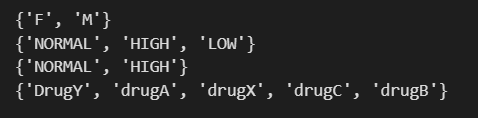

In [58]:
# biến đổi dữ liệu định tính sang định lượng: Sex, BP, Cholesterol và Drug
# 'M': 0, 'F': 1
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})
# 'HIGH': 2, 'NORMAL': 1, 'LOW': 0
data['BP'] = data['BP'].map({'HIGH': 2, 'NORMAL': 1, 'LOW': 0})
# 'HIGH': 1, 'NORMAL': 0
data['Cholesterol'] = data['Cholesterol'].map({'HIGH': 1, 'NORMAL': 0})
 # 'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'DrugY': 4
data['Drug'] = data['Drug'].map({'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'DrugY': 4})

In [ ]:
print(X)
print(y)

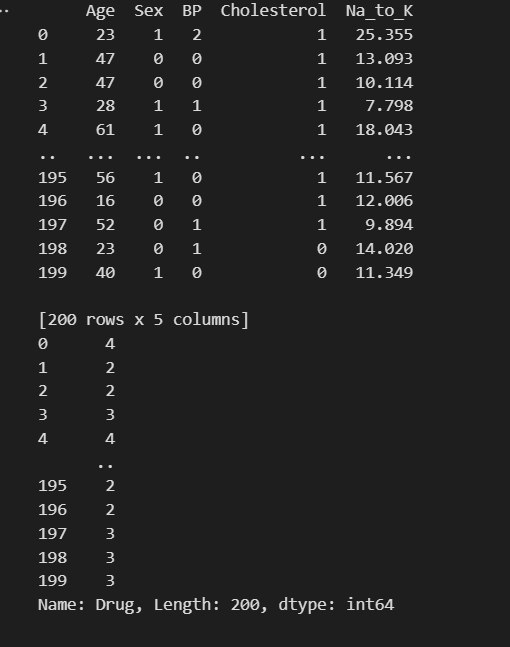

In [ ]:
# tạo dữ liệu train test với tỉ lệ tập test là 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)

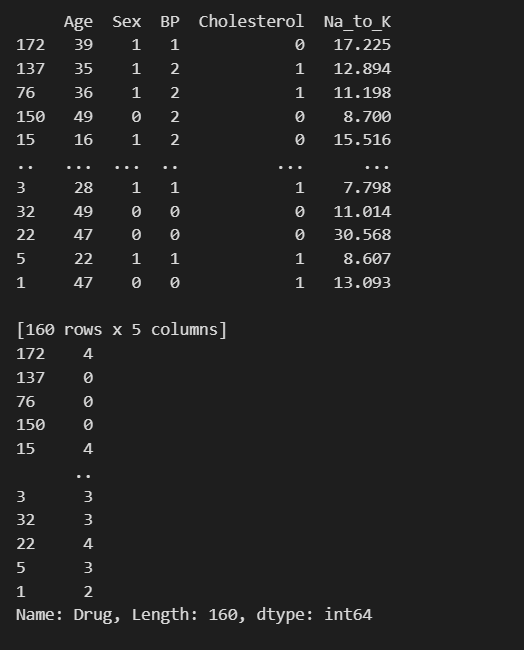

In [61]:
# dùng model Decision Tree

In [62]:
decisionTree = DecisionTreeClass(min_samples_split = 2, max_depth = 10)

In [63]:
decisionTree.fit(X_train, y_train)

In [ ]:
y_pred = decisionTree.predict(X_test)
print(y_pred)

Kết quả này các bạn không nhất thiết phải giống từng giá trị trong array. Tuy nhiên chiều dài phải giống
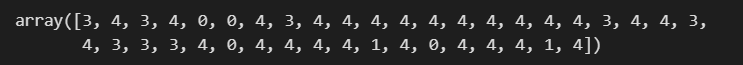

In [ ]:
print(y_test.values)

In [66]:
# độ chính xác
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
accuracy_dt = accuracy(y_test.values, y_pred)
print(f'Accuracy of Decision Tree: {accuracy_dt:.2f}')

In [68]:
# dùng model Random Forest

In [69]:
randomForest = RandomForest(n_trees = 3, n_features = 4)

In [ ]:
randomForest.fit(X_train, y_train)

In [ ]:
y_pred = randomForest.predict(X_test)
y_pred

In [ ]:
print(y_test.values)

In [ ]:
# độ chính xác
accuracy_rf = accuracy(y_test.values, y_pred)  # y_pred_rf là dự đoán của mô hình Random Forest
print(f'Accuracy of Random Forest: {accuracy_rf:.2f}')

In [2]:
# phát triển thêm:
# 1. Học thêm Decision Tree bằng thuật toán CART cho dự đoán cả Classification và Regression
# 2. Tìm hiểu về phương pháp cắt tỉa để giảm overfitting
# 3. Code lại baiTap sử dụng thư viện Scikit-learn
# 4. So sánh hai thuật toán của Decision Tree: ID3 (cái đang làm) và CART.

In [3]:
# Xem thêm ảnh dưới để biết thêm thuật toán nào nên dùng các kỹ thuật Scale
# Min-max scaler, Standard scaler, Robust scaler

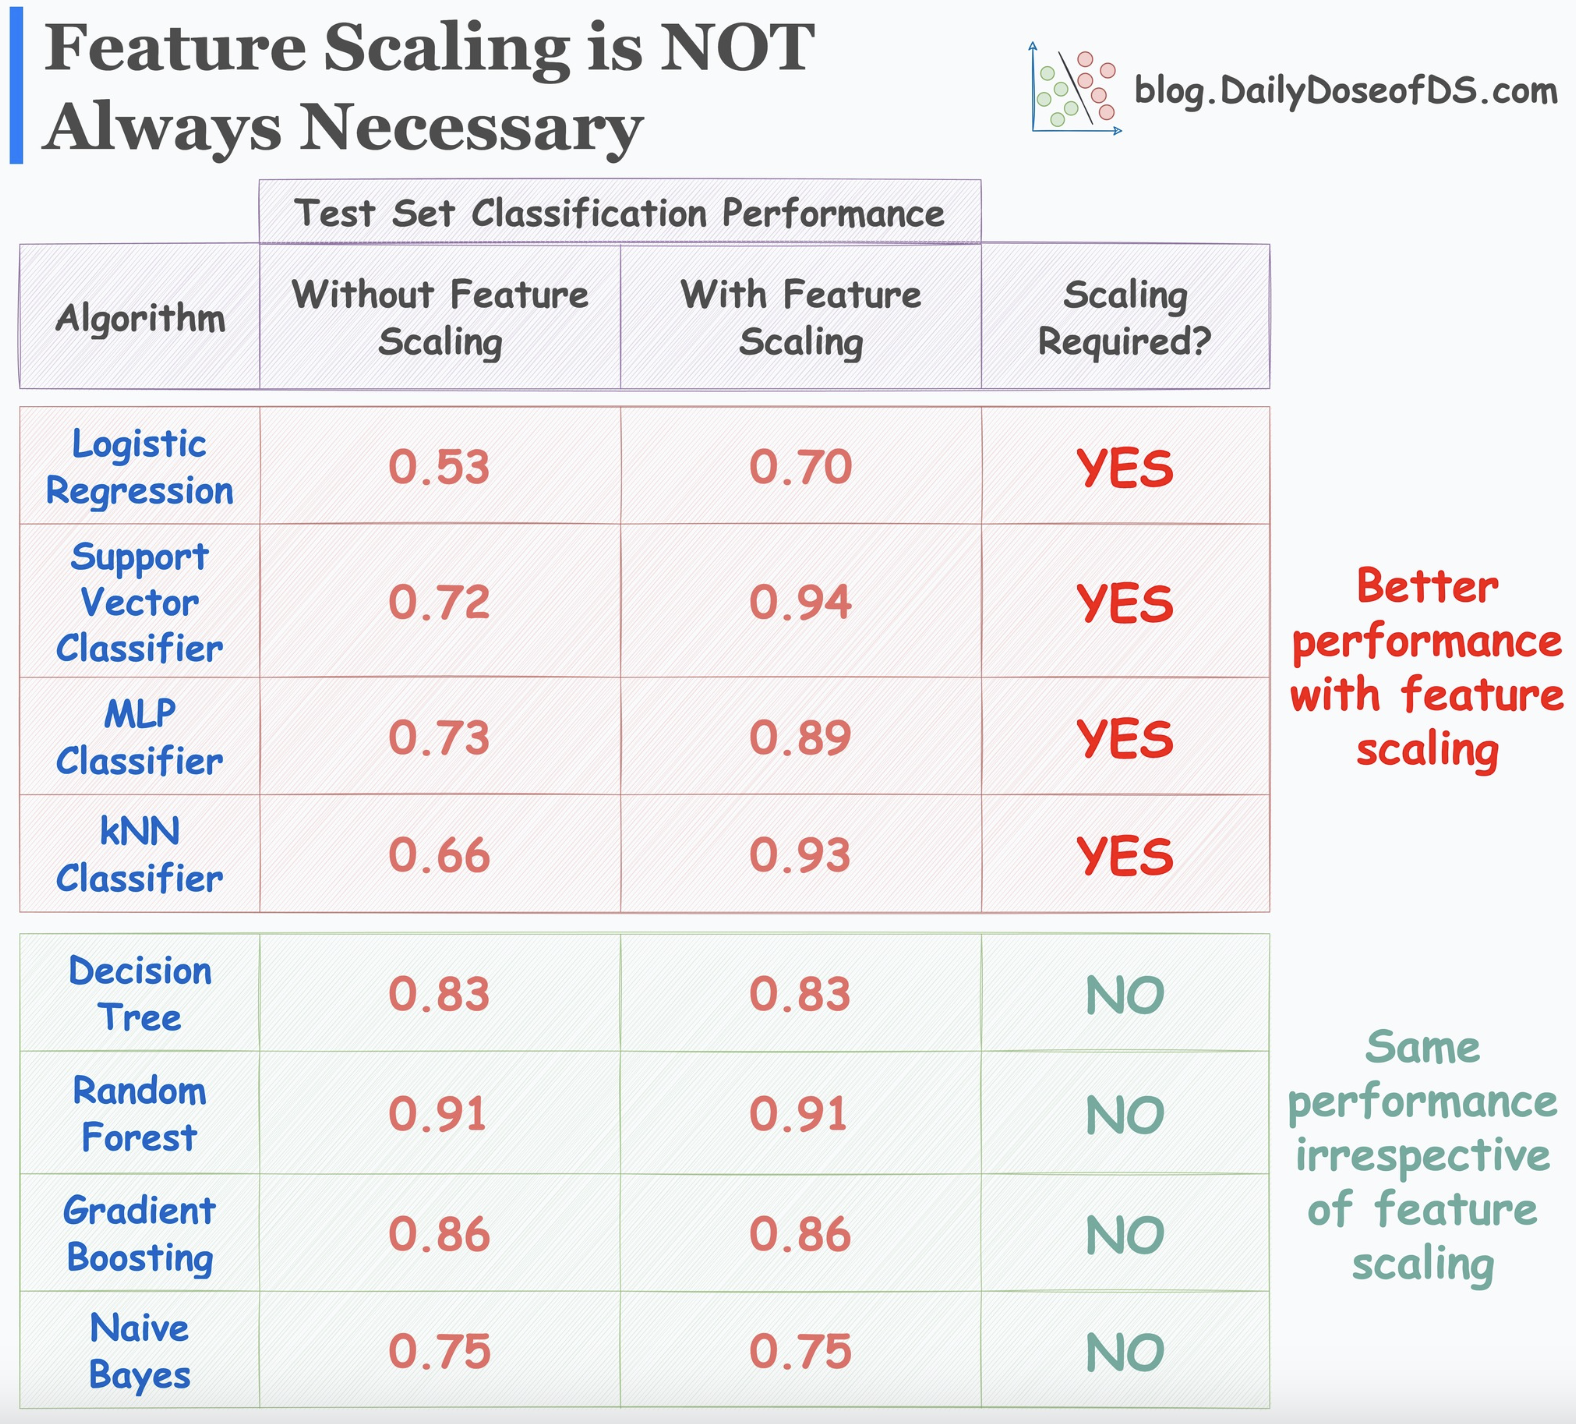